### 확률적 경사 하강법(SGD: Sochasctic Gradient Descent)
 - 머신러닝에도 많이 사용하지만 실질적으로 많이 사용한다.
 - 데이터가 추가 되었을 경우의 머신러닝 처리 방법

 1. 새로운 데이터로 모델을 추가하여 새롭게 학습하여 처리한다
 2. 추가 된 갯수만큼 기존의 데이터를 버리고 사용한다.
 3. 기존 모델을 수정하면서 사용한다. (점진적 학습방법)

- Epoch : 훈련 세트를 다 사용했을 경우의 단계
- mini batch 경사하강법중 mini batch의 갯수 : Hyper Parameter, 보통 2의 배수

### 손실함수
- 머신러닝 알고리즘이 에러율을 측정하는 함수
- 손실함수 값이 적은것이 정확도가 높은 것 

In [17]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
fish = pd.read_csv('../Data/fishes.csv')

In [8]:
# Feature
fish_input = fish[['Weight','Length','Diagonal','Height','Width']].to_numpy()
# Target
fish_target = fish['Species'].to_numpy()
# train, test
train_input, test_input, train_target, test_target = train_test_split(fish_input, fish_target, random_state=42)

In [9]:
# 표준화
ss = StandardScaler()
ss.fit(train_input, train_target)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [11]:
# 확률적 경사하강법의 분류 알고리즘 적용
from sklearn.linear_model import SGDClassifier
sc = SGDClassifier(loss='log', max_iter=10, random_state=42) # loss:손실함수 로지스틱회귀(선형방정식)를 쓸꺼야 / max_iter = epoch, 반복

In [12]:
sc.fit(train_scaled, train_target)
print("Train score :", sc.score(train_scaled, train_target))
print("Test score :", sc.score(test_scaled, test_target))

Train score : 0.773109243697479
Test score : 0.775


Train score : 0.773109243697479
Test score : 0.775
> score가 별로 안좋고, 과소적합. 그래서 다시 한번 더 학습시켜야 겠어

In [13]:
sc.partial_fit(train_scaled,train_target)
print("Train score :", sc.score(train_scaled, train_target))
print("Test score :", sc.score(test_scaled, test_target))
# 여기 계속 실행하면 실행하는만큼 예측력이 계속 바뀜 

Train score : 0.8151260504201681
Test score : 0.85


아까보다 예측력은 올랐지만 아직 만족스럽지도 않을뿐더러 과소적합임 

---
### Epoch와 과대/과소 적합
- 규제 값이 작아지면 과대적합이 된다.
- 조기종료 (Early Stopping) : 적합한 Epoch의 위치를 찾으면 종료한다.

In [16]:
sc = SGDClassifier(loss='log', random_state=42)

train_score = []
test_score = []
classes = np.unique(train_target)

for _ in range(0,300):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled, test_target))
    

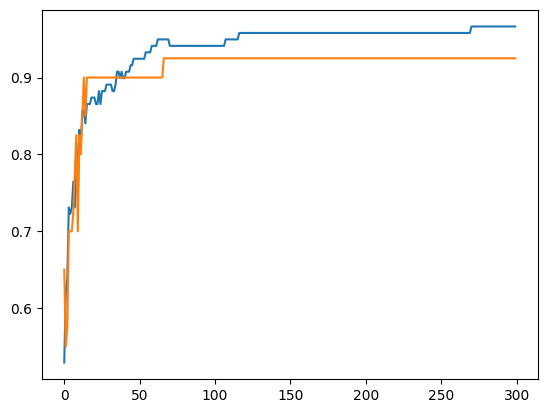

In [19]:
# 그래프로 보기

plt.plot(train_score)
plt.plot(test_score)
plt.show()

> 100 정도의 Epoch가 좋은 것 같다

In [20]:
# 새로운 마음으로!

sc = SGDClassifier(loss='log',max_iter=100, random_state=42, tol=None)
# tol=None : 조기종료 시점, 지금은 정지기준이 없고 반복기간동안의 최적의 손실값보다 큰 경우 조기 종료 한다.
sc.fit(train_scaled, train_target)
print("Train score :", sc.score(train_scaled, train_target))
print("Test score :", sc.score(test_scaled, test_target))

Train score : 0.957983193277311
Test score : 0.925


In [30]:
# 조기종료 시점 적용

sc = SGDClassifier(loss='log',max_iter=100, random_state=42, tol=1.0e-3)
sc.fit(train_scaled, train_target)
print("Train score :", sc.score(train_scaled, train_target))
print("Test score :", sc.score(test_scaled, test_target))

Train score : 0.8403361344537815
Test score : 0.8


In [24]:
print(1.0e-3)
print(1.0e-2)
print(1.0e-1)
print(1.0)

0.001
0.01
0.1
1.0


---
### SVM 을 이용하는 확률적 경사 하강법

In [31]:
# 조기종료가 없는 경우
sc = SGDClassifier(loss='hinge',max_iter=100, random_state=42, tol=None)

sc.fit(train_scaled, train_target)
print("Train score :", sc.score(train_scaled, train_target))
print("Test  score :", sc.score(test_scaled, test_target))

Train score : 0.9495798319327731
Test score : 0.925


In [32]:
# 조기종료가 있는 경우
sc = SGDClassifier(loss='hinge',max_iter=100, random_state=42, tol=0.0001)

sc.fit(train_scaled, train_target)
print("Train score :", sc.score(train_scaled, train_target))
print("Test  score :", sc.score(test_scaled, test_target))

Train score : 0.907563025210084
Test score : 0.925
